In [1]:
print("hi")

hi


In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
data_import = pd.read_csv("clothes_size.csv")
data_import

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [4]:
data_import["size"].value_counts()

size
M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: count, dtype: int64

In [6]:
#remove entries where we're missing data
dropped_data = data_import.copy()

dropped_data = dropped_data.dropna(axis=0) #dropping rows that are empty

num_dropped = len(data_import) - len(dropped_data)
print("num dropped: ", num_dropped)

num dropped:  581


In [7]:
dropped_data = dropped_data[dropped_data["size"] != "XXL"] #removing people who are XXL
dropped_data

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [8]:
X = dropped_data[["weight", "age", "height"]] #splitting data into label and "predictions"
y = dropped_data["size"]

In [13]:
y = dropped_data["size"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# X_train
# X_test

,weight,age,height
146,65,29.0,180.34
92226,61,41.0,162.56
79616,74,30.0,162.56
41654,53,48.0,154.94
62026,54,31.0,157.48
...,...,...,...
13667,52,31.0,162.56
102097,63,25.0,172.72
72771,58,31.0,175.26
114296,53,33.0,160.02


In [15]:
def dt_run(depth):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train, y_train)
    return tree_clf.score(X_test, y_test)  

dt_run(None)

0.510349750178444

In [17]:
#lets try diff values for our tree
accuracy = []
tree_depth = list(range(1, 100, 1))

In [18]:
for i in tree_depth:
    accuracy.append(dt_run(i))
accuracy

[0.39207288911281857,
 0.4429609102741739,
 0.469748498971323,
 0.49426879959692654,
 0.5031700046185498,
 0.5069488180711257,
 0.5118192887433346,
 0.5118612755594744,
 0.5143384977117185,
 0.515052273586094,
 0.518033337532015,
 0.5157660494604694,
 0.514422471343998,
 0.5124490909854306,
 0.5113154469496578,
 0.5124071041692908,
 0.5127429986984087,
 0.5105176974430029,
 0.5096359743040685,
 0.5101398160977453,
 0.5105596842591427,
 0.5107696183398412,
 0.5104337238107234,
 0.5105176974430029,
 0.5104757106268631,
 0.5102657765461645,
 0.5105176974430029,
 0.5102657765461645,
 0.510349750178444,
 0.5102657765461645,
 0.5103917369945837,
 0.5103077633623042,
 0.510349750178444,
 0.5102237897300248,
 0.5103077633623042,
 0.510349750178444,
 0.5104757106268631,
 0.510349750178444,
 0.5104757106268631,
 0.5103917369945837,
 0.5103077633623042,
 0.5100978292816056,
 0.5103077633623042,
 0.5098878952009069,
 0.5103077633623042,
 0.5103917369945837,
 0.5102657765461645,
 0.5103077633623042

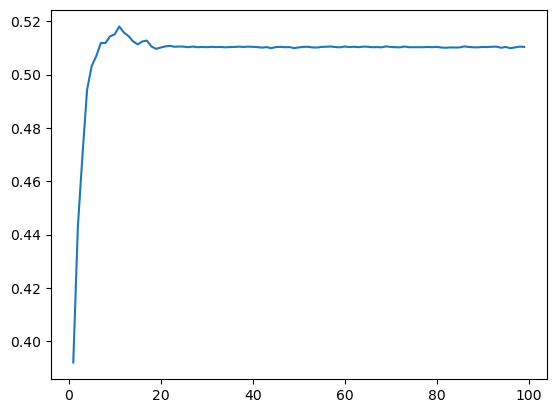

In [19]:
plt.plot(tree_depth, accuracy)

In [22]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [23]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8457617213770239912
xla_global_id: -1
]
